# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert).

### Data and Setup

**Import numpy and pandas**

In [1]:
import numpy as np
import pandas as pd

**Import visualization libraries and set %matplotlib inline**

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Read in the csv file as a dataframe called df**

In [3]:
df = pd.read_csv('911.csv')

**Check the information of the dataframe**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Check the head**

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Basics

**What are the top 5 zipcodes for 911 calls?**

In [6]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [7]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there?**

In [8]:
df['title'].nunique()

110

### Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Create a new column called "Reason" that contains this string value.** <br>
**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [9]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [10]:
df[['Reason','title']].head()

,Reason,title
0,EMS,EMS: BACK PAINS/INJURY
1,EMS,EMS: DIABETIC EMERGENCY
2,Fire,Fire: GAS-ODOR/LEAK
3,EMS,EMS: CARDIAC EMERGENCY
4,EMS,EMS: DIZZINESS


**What is the most common Reason for a 911 call based off of this new column?**

In [11]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**Use seaborn to create a countplot of 911 calls by Reason.**

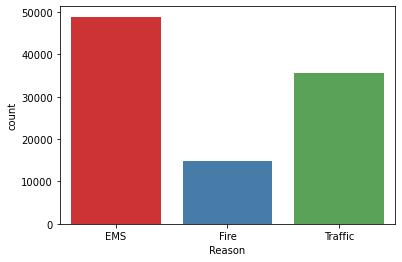

In [12]:
sns.countplot(df['Reason'], palette='Set1')

**(Focus on time information) <br>
What is the data type of the objects in the timeStamp column?**

In [13]:
type(df['timeStamp'][0])

str

**As these timestamps are still strings. Convert the column from strings to DateTime objects. ([pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html))**

In [14]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [15]:
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

**You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**Create 3 new columns called Hour, Month, and Day of Week, create these columns based off of the timeStamp column.**

In [16]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['DayOfWeek'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [17]:
df[['timeStamp','Hour','Month','DayOfWeek']].head()

,timeStamp,Hour,Month,DayOfWeek
0,2015-12-10 17:40:00,17,12,3
1,2015-12-10 17:40:00,17,12,3
2,2015-12-10 17:40:00,17,12,3
3,2015-12-10 17:40:01,17,12,3
4,2015-12-10 17:40:01,17,12,3


**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:** <br>

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [18]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [19]:
df['DayOfWeek'] = df['DayOfWeek'].map(dmap)

In [20]:
df[['timeStamp','Hour','Month','DayOfWeek']].head()

,timeStamp,Hour,Month,DayOfWeek
0,2015-12-10 17:40:00,17,12,Thu
1,2015-12-10 17:40:00,17,12,Thu
2,2015-12-10 17:40:00,17,12,Thu
3,2015-12-10 17:40:01,17,12,Thu
4,2015-12-10 17:40:01,17,12,Thu


**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column**

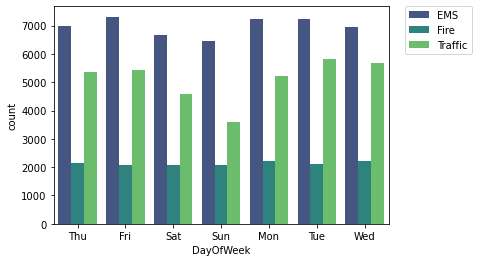

In [21]:
sns.countplot(df['DayOfWeek'], hue=df['Reason'], palette='viridis')
#to relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Do the same for Month:**

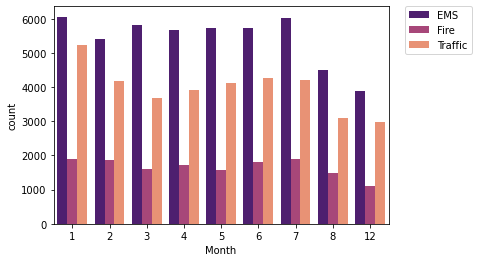

In [22]:
sns.countplot(df['Month'], hue=df['Reason'], palette='magma')
#to relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**(Did you notice something strange about the Plot?)** <br>
**You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...** <br>
**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [23]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,DayOfWeek
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Now create a simple plot off of the dataframe indicating the count of calls per month.**

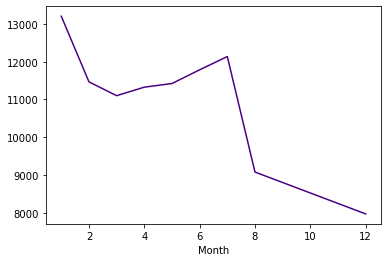

In [24]:
byMonth['Reason'].plot(c='indigo')

**Create a linear fit on the number of calls per month. You may need to reset the index to a column.**

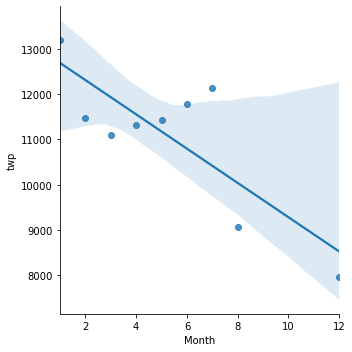

In [25]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column.** 

In [26]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

In [27]:
df[['timeStamp','Date']].head()

,timeStamp,Date
0,2015-12-10 17:40:00,2015-12-10
1,2015-12-10 17:40:00,2015-12-10
2,2015-12-10 17:40:00,2015-12-10
3,2015-12-10 17:40:01,2015-12-10
4,2015-12-10 17:40:01,2015-12-10


**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

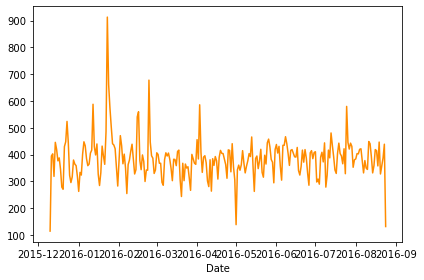

In [28]:
df.groupby('Date').count()['twp'].plot(c='darkorange')
plt.tight_layout()

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

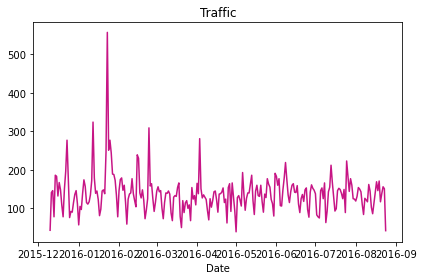

In [29]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot(c='mediumvioletred')
plt.title('Traffic')
plt.tight_layout()

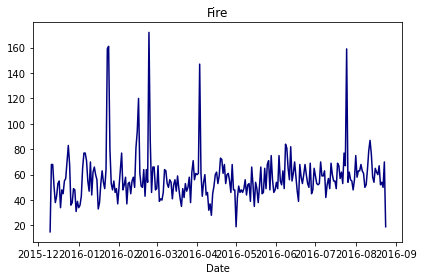

In [30]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot(c='navy')
plt.title('Fire')
plt.tight_layout()

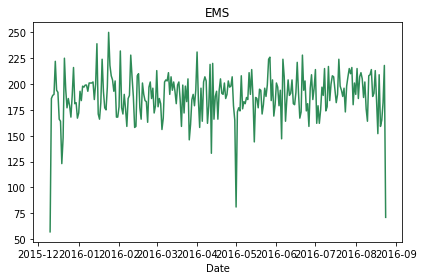

In [31]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot(c='seagreen')
plt.title('EMS')
plt.tight_layout()

**Restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.<br> Try to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method.**

In [32]:
dayHour = df.groupby(by=['DayOfWeek','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


**Create a HeatMap using this new DataFrame.**

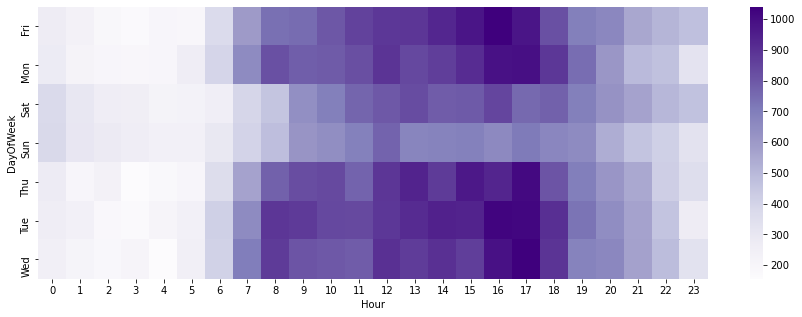

In [33]:
plt.figure(figsize=(15,5))
sns.heatmap(dayHour,cmap='Purples')

**Create a clustermap using this DataFrame.**

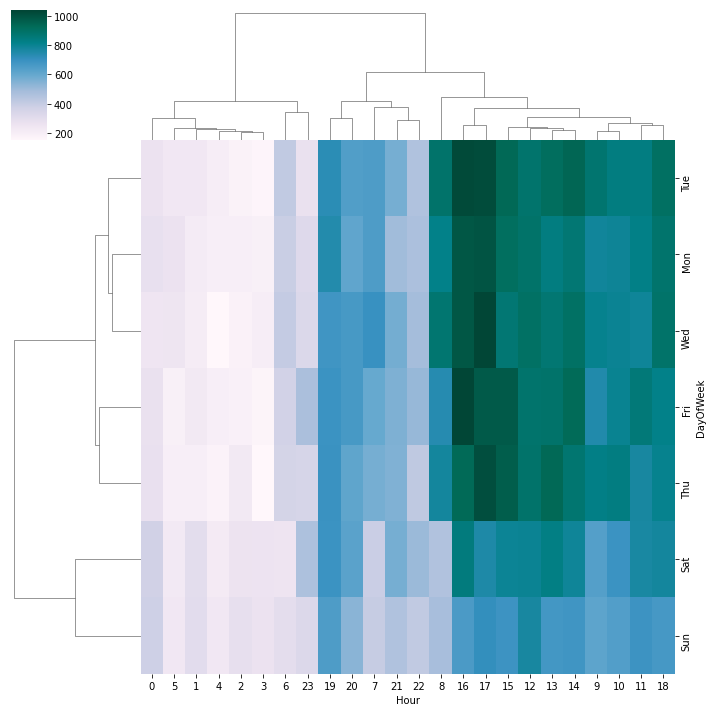

In [34]:
sns.clustermap(dayHour,cmap='PuBuGn')

**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [35]:
dayMonth = df.groupby(by=['DayOfWeek','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
DayOfWeek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


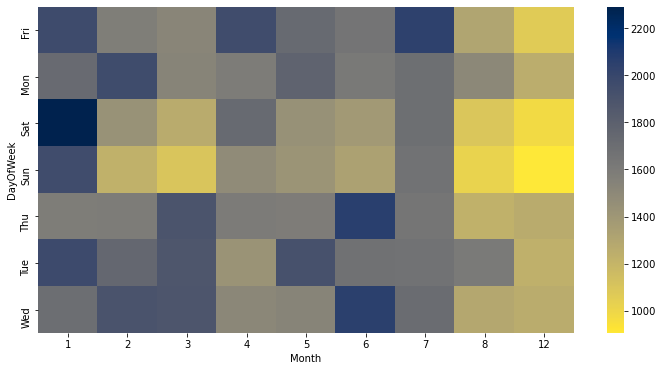

In [36]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='cividis_r')

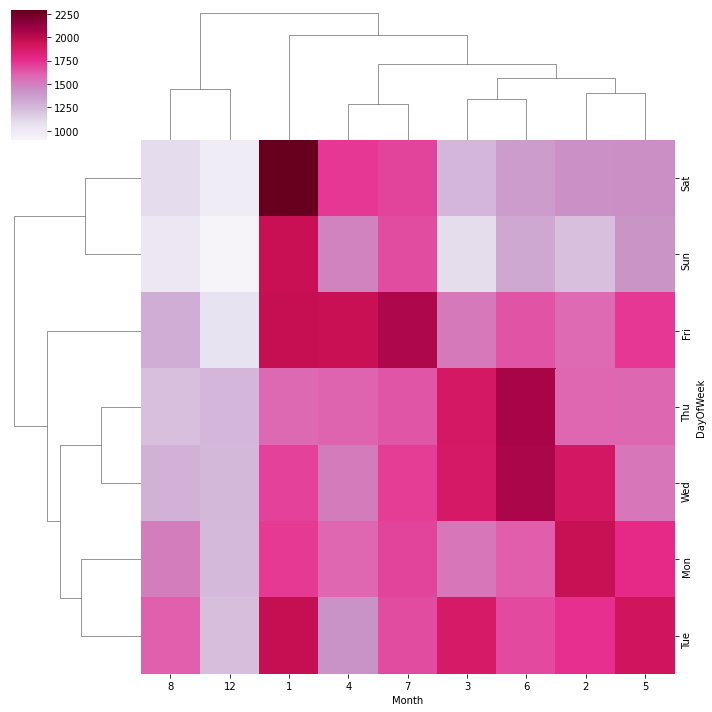

In [37]:
sns.clustermap(dayMonth,cmap='PuRd')